<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/Kaggle_Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train_df = pd.read_csv('./drive/MyDrive/AI_INOVATION_SQUARE/data/titanic_data/train.csv')
test_df = pd.read_csv('./drive/MyDrive/AI_INOVATION_SQUARE/data/titanic_data/test.csv')
test_sub_df = pd.read_csv('./drive/MyDrive/AI_INOVATION_SQUARE/data/titanic_data/gender_submission.csv')

###Data Frame 확인

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


###test_df에 정답 데이터 추가

In [6]:
test_df['Survived'] = test_sub_df['Survived']

test_df = test_df[['PassengerId', 'Survived', 'Pclass', 'Name','Sex', 'Age','SibSp','Parch','Ticket','Fare','Embarked']]

test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


###train 데이터의 missing data 처리

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

###test 데이터의 missing data 처리

In [10]:
test_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###딥러닝 학습을 위한 matrix 생성

In [12]:
train_csv_data = train_df.values
test_csv_data = test_df.values

print(type(train_csv_data), train_csv_data.shape)
print(type(test_csv_data), test_csv_data.shape)

<class 'numpy.ndarray'> (891, 12)
<class 'numpy.ndarray'> (418, 11)


###Data Conversion (문자 -> 숫자)

In [13]:
#male -> 1, female -> 

for i in range(len(train_csv_data)):
  
  if train_csv_data[i,4] == 'male':
      train_csv_data[i,4] = 1.0
  
  else:
      train_csv_data[i,4] = 0.0

for i in range(len(test_csv_data)):

  if test_csv_data[i,4] == 'male':
      test_csv_data[i,4] = 1.0
  
  else:
      test_csv_data[i,4] = 0.0

In [14]:
#Embarked Empty -> 0, S -> 1, C -> 2, Q -> 3

for i in range(len(train_csv_data)):

    if train_csv_data[i,11] == 'S':
        train_csv_data[i,11] = 1.0
    
    elif train_csv_data[i,11] == 'C':
        train_csv_data[i,11] = 2.0
      
    elif train_csv_data[i,11] == 'Q':
        train_csv_data[i,11] = 3.0

for i in range(len(test_csv_data)):

    if test_csv_data[i,10] == 'S':
        test_csv_data[i,10] = 1.0
    
    elif test_csv_data[i,10] == 'C':
        test_csv_data[i,10] = 2.0
    
    elif test_csv_data[i,10] == 'Q':
        test_csv_data[i,10] = 3.0

###training data 생성

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
training_input_data = train_csv_data[:, [2, 4, 5, 6, 7, 9]].astype('float32') #Pclass, Sex, Age, SibSp, Parch, Fare
training_target_data = train_csv_data[:, 1].astype('float32') #Survived

print("training_input_data.shape = ", training_input_data.shape, ", training_target_data.shape = ", training_target_data.shape)
print(training_input_data[1])
print(training_target_data[1])

training_input_data.shape =  (891, 6) , training_target_data.shape =  (891,)
[ 1.      0.     38.      1.      0.     71.2833]
1.0


###test data 생성

In [17]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
test_input_data = test_csv_data[:, [2, 4, 5, 6, 7, 9]].astype('float32') #Pclass, Sex, Age, SibSp, Parch, Fare
test_target_data = test_csv_data[:, 1].astype('float32') #Survived

print("test_input_data.shape = ", test_input_data.shape ,", test_target_data.shape = ", test_target_data.shape)
print(test_input_data[1])
print(test_target_data[1])

test_input_data.shape =  (418, 6) , test_target_data.shape =  (418,)
[ 3.  0. 47.  1.  0.  7.]
1.0


###오차 역전파를 위한 코드 구현

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
class Kaggle_Titanic():

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

    self.W2 = np.random.randn(input_nodes, hidden_nodes) / np.sqrt(input_nodes / 2)
    self.b2 = np.random.rand(hidden_nodes)

    self.W3 = np.random.randn(hidden_nodes, output_nodes) / np.sqrt(hidden_nodes / 2)
    self.b3 = np.random.rand(output_nodes)

    self.learning_rate = learning_rate

  def feed_forward(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    y = self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(y + delta) + (1 - self.target_data) * np.log((1 - y) + delta))

  def loss_val(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data
    
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    y = self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(y + delta) + (1 - self.target_data) * np.log((1 - y) + delta))

  def accuracy(self, test_input_data, test_target_data):

    matched_list = []

    temp_list = []
    index_label_prediction_list = []

    for i in range(len(test_input_data)):

      (real_val,predicted_num) = self.predict(np.array(test_input_data[i], dtype=np.float32, ndmin=2))

      if predicted_num == test_target_data[i]:
          matched_list.append(i)

      else:
          temp_list.append(i)
          temp_list.append(test_target_data[i])
          temp_list.append(predicted_num)

          index_label_prediction_list.append(temp_list)

          temp_list = []

    accuracy_val = len(matched_list) / len(test_input_data)

    return accuracy_val, index_label_prediction_list

  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    loss_val = self.feed_forward()

    loss_3 = (self.a3 - self.target_data) * self.a3 * (1 - self.a3)
    loss_2 = np.dot(loss_3,self.W3.T) * self.a2 * (1 - self.a2)

    self.W3 = self.W3 - self.learning_rate * np.dot(self.a2.T, loss_3)
    self.b3 = self.b3 - self.learning_rate * loss_3

    self.W2 = self.W2 - self.learning_rate * np.dot(self.a1.T, loss_2)
    self.b2 = self.b2 - self.learning_rate * loss_2

  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = sigmoid(z3)

    if y >= 0.5:
        predicted_num = 1

    else:
        predicted_num = 0

    return y, predicted_num

In [21]:
#hyper_parameter 
i_nodes = training_input_data.shape[1]
h_nodes = 50
o_nodes = 1
lr = 1e-4
epochs = 200

loss_val_list = []

train_acc_list = []
validation_acc_list = []

titanic_obj = Kaggle_Titanic(i_nodes, h_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(training_input_data)):

        input_data = training_input_data[step]
        target_data = training_target_data[step]

        titanic_obj.train(np.array(input_data, dtype=np.float32, ndmin=2) , np.array(target_data, dtype=np.float32, ndmin=2))

    cur_loss_val = titanic_obj.loss_val()
    print("epochs = ",i+1,", loss value = ", cur_loss_val)

    loss_val_list.append(cur_loss_val)

    (train_accuracy,index_label_prediction_list) = titanic_obj.accuracy(training_input_data, training_target_data)
    (validation_accuracy, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)

    train_acc_list.append(train_accuracy)
    validation_acc_list.append(validation_accuracy)

end_time =datetime.now()
print("\nElapsed time = ", end_time - start_time)

epochs =  1 , loss value =  0.38335839665206534
epochs =  2 , loss value =  0.3780279929059792
epochs =  3 , loss value =  0.3733159386778026
epochs =  4 , loss value =  0.3691774297281063
epochs =  5 , loss value =  0.3655609303564213
epochs =  6 , loss value =  0.3624122736264404
epochs =  7 , loss value =  0.3596774489352469
epochs =  8 , loss value =  0.3573044464673418
epochs =  9 , loss value =  0.3552444493552083
epochs =  10 , loss value =  0.353452560569051
epochs =  11 , loss value =  0.35188818642582775
epochs =  12 , loss value =  0.35051517807820715
epochs =  13 , loss value =  0.3493018341562861
epochs =  14 , loss value =  0.3482208280196237
epochs =  15 , loss value =  0.347248991276813
epochs =  16 , loss value =  0.3463668581108349
epochs =  17 , loss value =  0.34555809357066114
epochs =  18 , loss value =  0.3448089957183564
epochs =  19 , loss value =  0.34410810434115413
epochs =  20 , loss value =  0.343445875960151
epochs =  21 , loss value =  0.3428144037184737

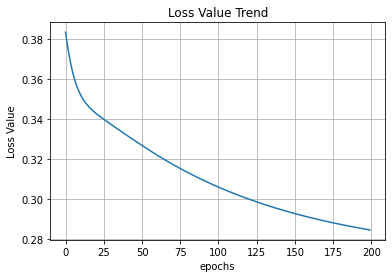

In [22]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss Value')
plt.grid()
plt.plot(loss_val_list)
plt.show()

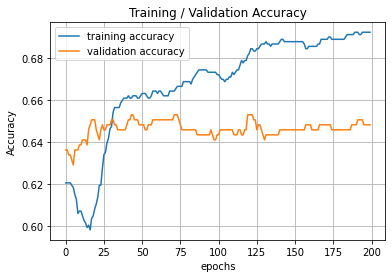

In [23]:
plt.title('Training / Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_acc_list)
plt.plot(validation_acc_list)
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

In [24]:
(accuracy_result, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)
print("Accuracy = ", 100 * np.round(accuracy_result,2),'%')

Accuracy =  65.0 %


In [28]:
dicaprio = np.array([3., 1., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)

(d_probability, alive_or_dead) = titanic_obj.predict(dicaprio)

print(d_probability, alive_or_dead)

(w_probability, alive_or_dead) = titanic_obj.predict(winslet)

print(w_probability, alive_or_dead)

[[0.25337264]] 0
[[0.63094388]] 1
